In [1]:
import pandas as pd

df = pd.read_excel('/content/economic_indicators_dataset_2010_2023.xlsx')

print(df.head())

        Date Country  Inflation Rate (%)  GDP Growth Rate (%)  \
0 2010-01-31  Brazil                1.23                 0.69   
1 2010-01-31  France                6.76                 2.59   
2 2010-01-31     USA                7.46                 4.84   
3 2010-02-28  Brazil                5.43                 0.31   
4 2010-02-28  Canada                0.69                -0.52   

   Unemployment Rate (%)  Interest Rate (%)  Stock Index Value  
0                  10.48               7.71           21748.85  
1                   4.27               7.39           10039.56  
2                   2.64               6.39           13129.10  
3                   8.26               6.09           23304.58  
4                  11.92              -0.51           16413.03  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----       

In [ ]:
print(df.info())

In [ ]:
# 1. Handling Missing Values
# Check for missing values in each column
print(df.isnull().sum())

In [7]:
# - Drop rows with missing values (if few missing values):
df.dropna(inplace=True)

df['GDP Growth Rate (%)'].fillna(df['GDP Growth Rate (%)'].mean(), inplace=True)
df['GDP Growth Rate (%)'] = df['GDP Growth Rate (%)'].fillna(method='ffill')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   500 non-null    datetime64[ns]
 1   Country                500 non-null    object        
 2   Inflation Rate (%)     500 non-null    float64       
 3   GDP Growth Rate (%)    500 non-null    float64       
 4   Unemployment Rate (%)  500 non-null    float64       
 5   Interest Rate (%)      500 non-null    float64       
 6   Stock Index Value      500 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 27.5+ KB
None


<ipython-input-7-a32c035f4d6b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GDP Growth Rate (%)'].fillna(df['GDP Growth Rate (%)'].mean(), inplace=True)
<ipython-input-7-a32c035f4d6b>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['GDP Growth Rate (%)'] = df['GDP Growth Rate (%)'].fillna(method='ffill') # Or method = 'bfill'


In [9]:
# Outlier Handling
# One way to deal with outliers is to cap them at a certain percentile.
upper_limit = df['GDP Growth Rate (%)'].quantile(0.95)
lower_limit = df['GDP Growth Rate (%)'].quantile(0.05)
df['GDP Growth Rate (%)'] = df['GDP Growth Rate (%)'].clip(lower=lower_limit, upper=upper_limit)

In [4]:
# Data Type Conversion (if necessary)
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Feature Scaling/Normalization (if needed for some visualizations)
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['GDP Growth Rate (%)', 'Inflation Rate (%)', 'Interest Rate (%)', 'Stock Index Value']] = scaler.fit_transform(df[['GDP Growth Rate (%)', 'Inflation Rate (%)', 'Interest Rate (%)', 'Stock Index Value']])

In [17]:
# # Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['GDP Growth Rate (%)', 'Inflation Rate (%)', 'Interest Rate (%)', 'Stock Index Value']] = scaler.fit_transform(df[['GDP Growth Rate (%)', 'Inflation Rate (%)', 'Interest Rate (%)', 'Stock Index Value']])

In [13]:
# Encoding Categorical Variables (if any)
# - One-hot encoding
if 'CategoricalColumn' in df.columns:
   df = pd.get_dummies(df, columns=['CategoricalColumn'], drop_first=True)

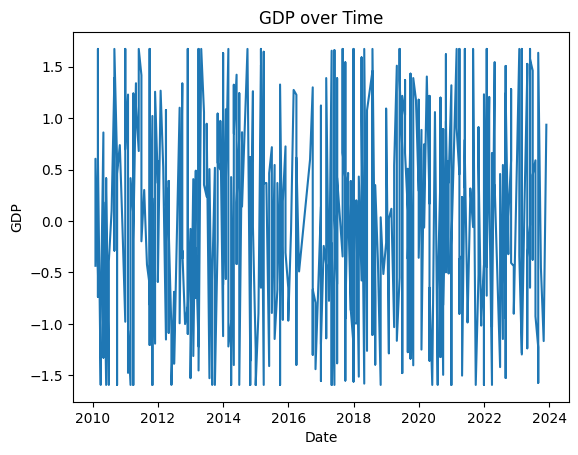

In [15]:
# visualization
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['GDP Growth Rate (%)'])
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP over Time')
plt.show()